In [1]:
import pandas as pd

In [3]:
df['label'].value_counts()

blues        100
reggae       100
rock         100
hiphop       100
metal        100
classical    100
jazz         100
2            100
pop          100
country      100
disco        100
1            100
Name: label, dtype: int64

In [4]:
# A drawback to the second CSV file, the final column 'label', which 
# Contains the song genre, has around 200 observations labeled with
# Integers (1 & 2) rather than a string containing a genre.
# We are able to see the the genres are divided into 100 classical and
# 100 pop songs if you look at the first column 'filename'.
# That being said, I wanted to clarify things by making a column called
# 'genre' which will do effectively what 'label' does but will fix the
# Issue of the mislabled observations from the second CSV.

genres = []

for _ in df['filename']:
    genres.append(_[:-9])

df.insert(1, 'genre', genres)

In [4]:
# For my benefit, I reordered the columns

df = df[['genre', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20']]
df.head()

,genre,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,blues,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987
1,blues,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485
2,blues,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260
3,blues,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607
4,blues,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315


In [5]:
# !pip install pandas-profiling

In [6]:
# We see there are ten unique genres contained in the data

df['genre'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [7]:
# Unfortunately, due to the second CSV file, there are 100
# Additional Pop and Classical songs in this dataset

df['genre'].value_counts()

pop          200
classical    200
jazz         100
rock         100
metal        100
blues        100
country      100
reggae       100
hiphop       100
disco        100
Name: genre, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

# To split the data into Train, Val and Test, I decided to use the
# train_test_split feature from sklearn using 80% for Train and
# 20% for Test

train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42)

In [9]:
# In order to make the Val data, I once again split using the
# Train data.

train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=42)

In [10]:
# !pip install category-encoders

In [10]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [11]:
# To make this simple, I make a function to wrangle the data into
# The corresponding X and Y datasets

def wrangle(train, val, test):
    
    X_train = train.drop(columns='genre')
    y_train = train['genre']
    X_val = val.drop(columns='genre')
    y_val = val['genre']
    X_test = test.drop(columns='genre')
    
    # I decide to run the genre column through Ordinal Encoder
    # Though, enumerating the genres probably wasn't necessary
    
    encoder = ce.OrdinalEncoder()

    y_train = encoder.fit_transform(y_train)
    y_val = encoder.transform(y_val)
    
    return X_train, y_train, X_val, y_val, X_test

In [12]:
# Unpacking the datasets
X_train, y_train, X_val, y_val, X_test = wrangle(train, val, test)

In [14]:
for df in X_train, y_train, X_val, y_val, X_test:
    print(df.shape)

(768, 28)
(768, 1)
(192, 28)
(192, 1)
(240, 28)


In [13]:
# Base LogReg model - Good
import numpy as np
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', multi_class='ovr')

model.fit(X_train, np.ravel(y_train))

# ASIDE: Unlike in Google Colab, I continued receiving error messages when
# Passing through y_(dataset) into various parameters such as in the code
# Below.  The messages suggested I use '.ravel()' from Numpy so, this will
# Be seen throughout the notebook.

print('Validation Accuracy', model.score(X_val, np.ravel(y_val)))

Validation Accuracy 0.65625


In [14]:
from sklearn.pipeline import make_pipeline

# Validation Accuracy with StandardScaler - Better!

# Incorporating Standard Scaler to scale the data yielded
# A 3% increase in model accuracy
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear', multi_class='ovr')
)
pipeline.fit(X_train, np.ravel(y_train))
print('Validation Accuracy', pipeline.score(X_val, np.ravel(y_val)))

Validation Accuracy 0.6875


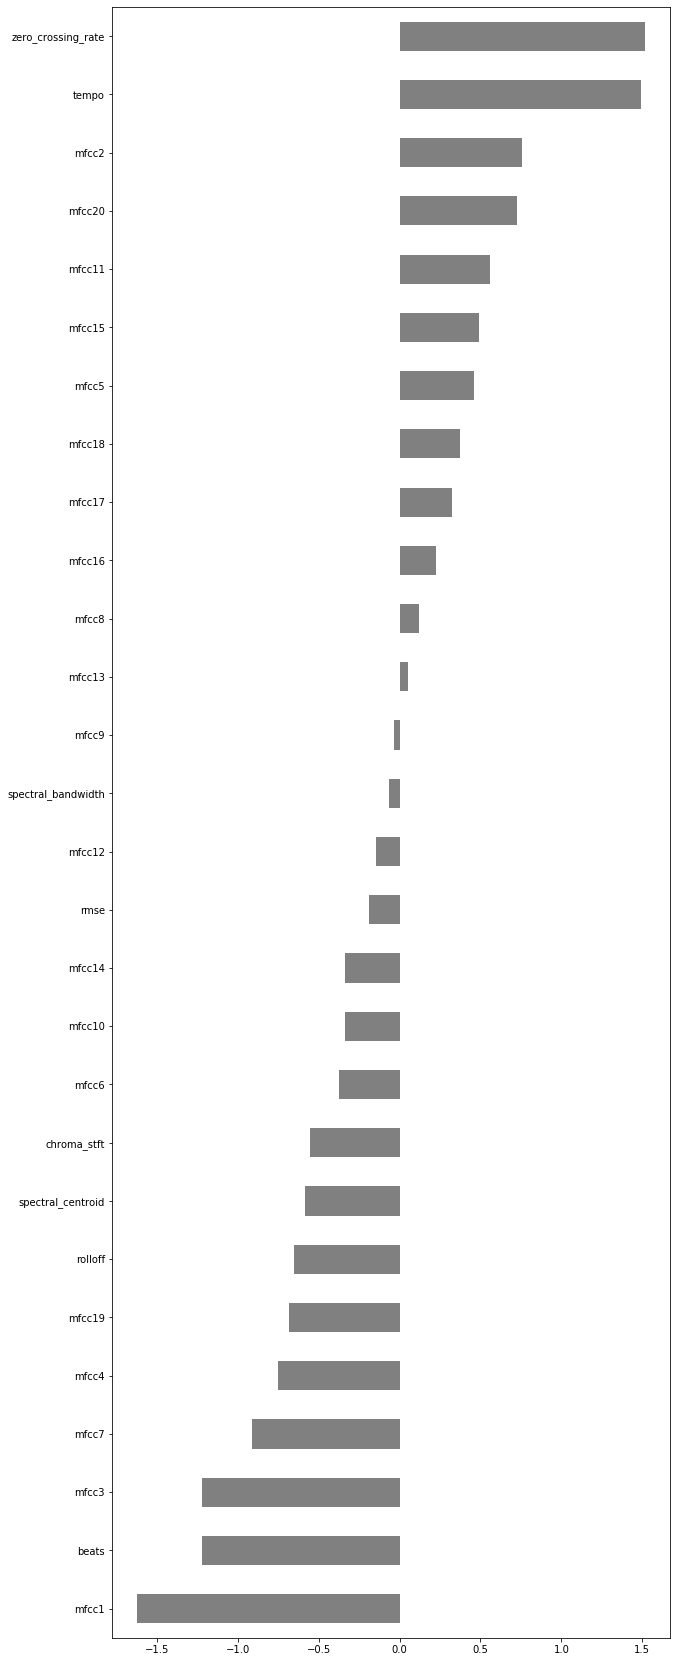

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plotting the coefficients for each feature

model = pipeline.named_steps['logisticregression']
scaler = pipeline.named_steps['standardscaler']
coefficients = pd.Series(model.coef_[0], X_val.columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Decision Tree with default attributes - Worse
pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)
pipeline.fit(X_train, np.ravel(y_train))
print('Validation Accuracy with Decision Tree at Default:', pipeline.score(X_val, np.ravel(y_val)))

Validation Accuracy with Decision Tree at Default: 0.59375


In [20]:
# Decision Tree Regressor - BAD

# At first I was confused why I received such a low score but then
# Realized that while most of the data contained continuous features
# This is still a classification problem therefore, a regression
# Model would probably reveal 'bupkis'.
from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(random_state=42)
)
pipeline.fit(X_train, np.ravel(y_train))
print('Validation Accuracy with Decision Tree Regressor at Default:', pipeline.score(X_val, np.ravel(y_val)))

Validation Accuracy with Decision Tree Regressor at Default: 0.11846513599628039


In [21]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# Trying more models, this most likely relates to the former regression
# Model in that is is not the correct type to use in this situation

feature = 'mfcc9'

lr = make_pipeline( 
    StandardScaler(), 
    LogisticRegressionCV(multi_class='ovr', solver='liblinear', cv=5)
)

lr.fit(X_train[[feature]], np.ravel(y_train))
score = lr.score(X_val[[feature]], np.ravel(y_val))
print('Logistic Regression, Validation Accuracy', score)

Logistic Regression, Validation Accuracy 0.3125


In [23]:
from sklearn.model_selection import cross_val_score

# Cross-val score yields varying results using the train datasets

target = 'genre'

features = X_train.columns

X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)

k=3
scores = cross_val_score(pipeline, X_train, y_train, cv=k,
                         scoring='accuracy')
print(f'Accuracy for {k} folds:', scores)

Accuracy for 3 folds: [0.68076923 0.64313725 0.70750988]


In [24]:
# The mean of these three scores is still not as good as
# The RandomForestClassifier on the Val dataset
scores.mean()

0.6771387890313721

In [25]:
# ASIDE: I'm going to save whomever tries to run this code a
# Lot of time by editing the two separate times
# In which I ran Cross-Validation tests totaling 2000 fits...

In [27]:
print('Best hyperparameters', search.best_params_)
print('Cross-Validation Accuracy Score', search.best_score_)

Best hyperparameters {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 422, 'standardscaler__with_mean': True, 'standardscaler__with_std': False}
Cross-Validation Accuracy Score 0.6901041666666666


In [28]:
# Again, 40 additional fits with the new paramerer distribution

param_distributions = {
    'standardscaler__with_mean': [True, False],
    'standardscaler__with_std': [True, False],
    'randomforestclassifier__n_estimators': randint(50,500),
    'randomforestclassifier__max_depth': [5,10,15,20,None],
    'randomforestclassifier__max_features': uniform(0,1),
}

search2 = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=4,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search2.fit(X_train, y_train);

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:   38.6s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   39.0s finished
/home/jb8268/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
print('Best hyperparameters', search2.best_params_)
print('Cross-Validation Accuracy Score', search2.best_score_)

Best hyperparameters {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.7877898675900498, 'randomforestclassifier__n_estimators': 173, 'standardscaler__with_mean': True, 'standardscaler__with_std': True}
Cross-Validation Accuracy Score 0.6848958333333334


In [30]:
# As expected, I was not able to beat my former RandomForest
# Model's score of 70% and it was probably wasting a lot of
# Time running so many fits over an hour.

In [31]:
# To make a comparison to see how close these models are
# I will make a confusion matrix for both the original
# RandomForest model as well as the model with the best params
# From the Cross-Validation search.
y_pred = search.predict(X_val)

In [32]:
y_val = val['genre']

In [18]:
import seaborn as sns

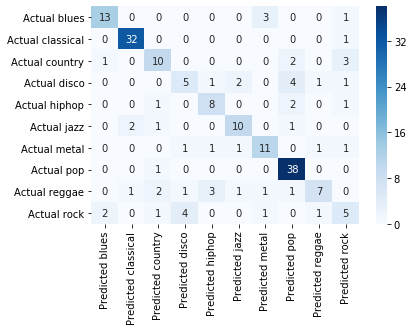

In [34]:
# Confusion Matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    df = pd.DataFrame(confusion_matrix(y_true, y_pred),
                     columns=columns, index=index)
    return sns.heatmap(df, annot=True, fmt='d', cmap='Blues')

# Confusion Matrix from model fitted in CV search
plot_confusion_matrix(y_val, y_pred);

In [36]:
# Exploring possibility of feature elimination to obtain
# A better accuracy for my model using Permutation Importance
# And show_weights from eli5

# First we need to scale the data with Standard Scaler and 
# Transform the data before we can use our best model

scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_val_transformed = scaler.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
# !pip install eli5

In [38]:
import eli5
from eli5.sklearn import PermutationImportance

# Using Permutation Importance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [40]:
# Removing features of minimal importance

minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_minim = X_train[features]
print(f'Shape after removing features:', X_train_minim.shape)

Shape after removing features: (768, 26)


In [41]:
# Passing the new dataset through the original pipeline

X_val_minim = X_val[features]

pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)
pipeline.fit(X_train_minim, np.ravel(y_train))
print('Validation Accuracy after feature removal:', pipeline.score(X_val_minim, np.ravel(y_val)))

Validation Accuracy after feature removal: 0.7239583333333334


In [42]:
# Quite a surprise to me, removing the features increased my
# Model's accuracy by almost two percentage points.

In [6]:
# Because the data is split between two separate CSV
# Files, we have to concatenate the two datasets into one.

df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('data_2genre.csv')
df = pd.concat([df1, df2])
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [7]:
genres = []

for _ in df['filename']:
    genres.append(_[:-9])

df.insert(1, 'genre', genres)

df = df[['genre', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20']]

df['genre'].value_counts()

classical    200
pop          200
blues        100
reggae       100
rock         100
hiphop       100
metal        100
jazz         100
country      100
disco        100
Name: genre, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Model with defaults - Best so far!
# With n_estimators=100 gives best accuracy so far (100 is now the default
# for the n_estimators parameter)
pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)
pipeline.fit(X_train, np.ravel(y_train))
print('Random Forest Val Accuracy with Defaults:', pipeline.score(X_val, np.ravel(y_val)))

Random Forest Val Accuracy with Defaults: 0.7083333333333334


In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

# In attempts to add some cross-validation to my project
# Rather than doing a plethora of iterations selecting
# The best fit, I will only perform 80 total fits between
# Two separate cells which contain different parameters
# For 'RandomForestClassifier__max_features'

param_distributions = {
    'standardscaler__with_mean': [True, False],
    'standardscaler__with_std': [True, False],
    'randomforestclassifier__n_estimators': randint(50,500),
    'randomforestclassifier__max_depth': [5,10,15,20,None],
    'randomforestclassifier__max_features': [None, 'auto', 'log2'],
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=4,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:   30.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   31.0s finished
/home/jb8268/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


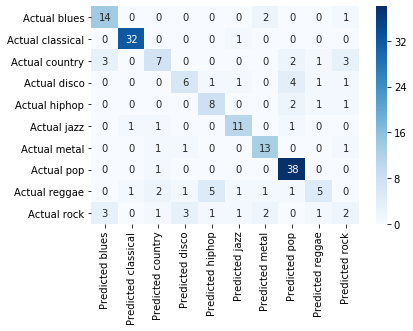

In [35]:
# Confusion Matrix with 70% accuracy from first Random Forest model

# Both of them are on point for the Classical and Pop songs but
# They vary somewhat with the other genres.  Perhaps if there were
# An even distribution of genres they may have be similar
import matplotlib.pyplot as plt

pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)
pipeline.fit(X_train, np.ravel(y_train))

y_pred = pipeline.predict(X_val)
plot = plot_confusion_matrix(y_val, y_pred)
fig = plot.get_figure()
fig.savefig('confusion_matrix.png')

In [39]:
# This visual shows that two of the features from the dataset
# Have a negative weight therefore, those features will be
# Removed in efforts to increase the model's accuracy

eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0.0792 ± 0.0250,chroma_stft
0.0490 ± 0.0193,mfcc17
0.0479 ± 0.0102,mfcc4
0.0313 ± 0.0147,rmse
0.0271 ± 0.0267,mfcc9
0.0229 ± 0.0243,spectral_bandwidth
0.0229 ± 0.0083,mfcc11
0.0167 ± 0.0121,mfcc20
0.0167 ± 0.0179,tempo
0.0156 ± 0.0174,mfcc3
